# Cyber Security And Artificial Intelligence
# HW1

## Installations 

In [1]:
import sys
print(f'install sklearn if not installed')
!{sys.executable} -m pip install sklearn
print(f'install ember if not installed')
!{sys.executable} -m pip install git+https://github.com/elastic/ember.git

install sklearn if not installed
install ember if not installed


You should consider upgrading via the 'c:\users\usser\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Cloning https://github.com/elastic/ember.git to c:\users\usser\appdata\local\temp\pip-req-build-4rha00o_
  Resolved https://github.com/elastic/ember.git to commit 4dee42918694d72d319e731940755146a71f5c6c
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none -q https://github.com/elastic/ember.git 'C:\Users\USSeR\AppData\Local\Temp\pip-req-build-4rha00o_'
You should consider upgrading via the 'c:\users\usser\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Imports & Preparations

### Imports

In [110]:
# math 
import math
import numpy as np
np.random.seed(0)
import pandas as pd
from scipy import stats
from scipy.stats import geom

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# general
import time
import json
import ast

# EMBER
import ember

In [35]:
folder_path = r'C:\\Users\\USSeR\\Downloads\\ember_dataset_2018_2\\ember2018\\' # /Users/royrubin/Downloads/ember2018/

### Create Vectorized Dataset

In [5]:
%%time

# Takes 2h 40 min
ember.create_vectorized_features(folder_path)

Vectorizing training set


100%|████████████████████████████████████████████████████████████████████████| 800000/800000 [06:10<00:00, 2159.49it/s]


Vectorizing test set


100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [01:28<00:00, 2254.73it/s]

Wall time: 8min 18s


### Get "Metadata"

In [6]:
%%time

# takes 32 mins 
ember.create_metadata(folder_path)

Wall time: 3min 39s


,sha256,appeared,label,avclass,subset
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,2006-12,0,,train
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,2007-01,0,,train
2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,2007-02,0,,train
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,2007-02,0,,train
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,2007-02,0,,train
...,...,...,...,...,...
999995,e033bc4967ce64bbb5cafdb234372099395185a6e0280c...,2018-12,1,zbot,test
999996,c7d16736fd905f5fbe4530670b1fe787eb12ee86536380...,2018-12,1,flystudio,test
999997,0020077cb673729209d88b603bddf56b925b18e682892a...,2018-12,0,,test
999998,1b7e7c8febabf70d1c17fe3c7abf80f33003581c380f28...,2018-12,0,,test


In [7]:
## Perform EDA on metadata

In [8]:
metadata_dataframe = ember.read_metadata(folder_path)

In [9]:
print(metadata_dataframe.shape)
metadata_dataframe.head(5)

(1000000, 5)


,sha256,appeared,label,avclass,subset
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,2006-12,0,NaN,train
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,2007-01,0,NaN,train
2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,2007-02,0,NaN,train
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,2007-02,0,NaN,train
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,2007-02,0,NaN,train


data_subset 
{'train': 800000, 'test': 200000}


Text(0.5, 1.0, 'data_subset')

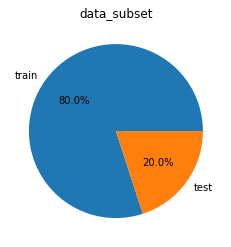

In [10]:
data_subset = metadata_dataframe.subset.value_counts(normalize=False, sort=True).to_dict()  # normalize returns the amount of samples
print(f'data_subset \n{data_subset}')
plt.pie(data_subset.values(), labels=data_subset.keys(), autopct="%1.1f%%")
plt.title("data_subset")

label counts 
{'0 : Benign': 400000, '1 : Malicious': 400000, '-1 : Unlabeled': 200000}


Text(0.5, 1.0, 'Overall labels count')

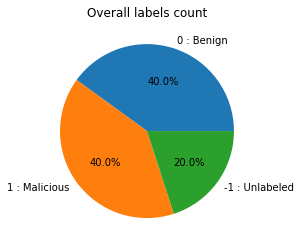

In [11]:
label_counts = metadata_dataframe.label.value_counts(normalize=False, sort=True).to_dict()  # normalize returns the amount of samples
label_counts['0 : Benign'] = label_counts.pop(0)
label_counts['1 : Malicious'] = label_counts.pop(1)
label_counts['-1 : Unlabeled'] = label_counts.pop(-1)

print(f'label counts \n{label_counts}')
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct="%1.1f%%")
plt.title("Overall labels count")

In [12]:
TODO: make the pie chart above divided by train and test sets ! (maybe even instead of the graph above)

SyntaxError: invalid syntax (Temp/ipykernel_2332/1185235283.py, line 1)

## Perform EDA on vectorized data

In [13]:
%%time
X_train, y_train, X_test, y_test = ember.read_vectorized_features(folder_path)

Wall time: 7.01 ms


In [14]:
print(X_train.shape)
X_train[0:5,0:5]

(800000, 2381)


memmap([[0.01467612, 0.00422187, 0.00392268, 0.00402875, 0.00400715],
        [0.18452372, 0.0313075 , 0.00569281, 0.00595852, 0.00814364],
        [0.25173673, 0.01420455, 0.00684149, 0.00855602, 0.02349299],
        [0.00896443, 0.00405471, 0.00392475, 0.00393569, 0.00403662],
        [0.02040114, 0.00521317, 0.00451895, 0.00409687, 0.00423987]],
       dtype=float32)

In [15]:
X_train[0,0]

0.014676122

In [55]:
%%time

from sklearn.decomposition import PCA

n_components = 40

print(f'Performing PCA on train data')
pca = PCA(n_components=n_components).fit(X_train)

Performing PCA on train data
Wall time: 1min 13s


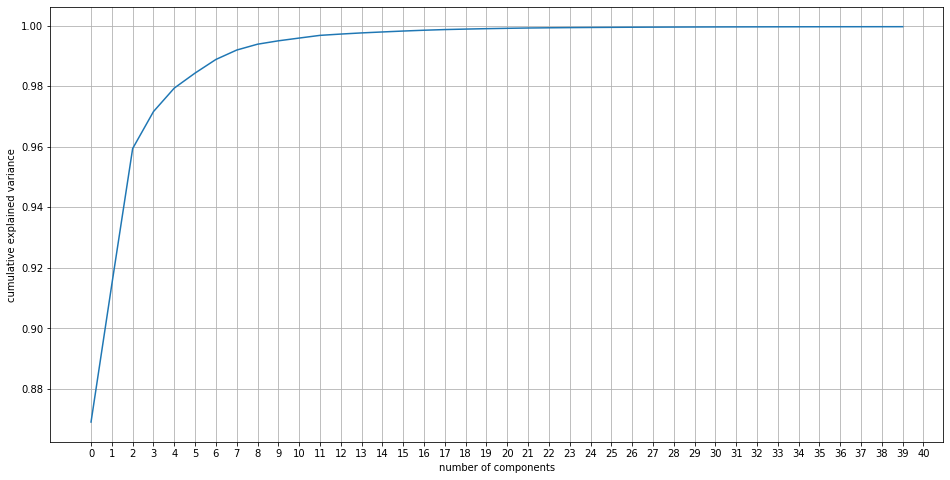

In [56]:
variance_ratio = pca.explained_variance_ratio_  #assumption: this is already sorted (importent for the cumsum)
cumulative_sum = np.cumsum(variance_ratio)
plt.figure(0, figsize=(16,8))
plt.plot(cumulative_sum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(0, len(cumulative_sum)+1, 1.0))  
plt.grid()
plt.show()

In [57]:
for i in range(1,11):
    print(f'(VARIANCE!?!?*****) cumulative sum of the first {i} (sorted) componenets is : {cumulative_sum[i]}')

cumulative sum of the first 1 (sorted) componenets is : 0.9145521754664171
cumulative sum of the first 2 (sorted) componenets is : 0.9593754388333237
cumulative sum of the first 3 (sorted) componenets is : 0.9715890384410013
cumulative sum of the first 4 (sorted) componenets is : 0.9793535593247803
cumulative sum of the first 5 (sorted) componenets is : 0.9843193763303825
cumulative sum of the first 6 (sorted) componenets is : 0.9888164894016142
cumulative sum of the first 7 (sorted) componenets is : 0.9919254431994474
cumulative sum of the first 8 (sorted) componenets is : 0.9938579641653053
cumulative sum of the first 9 (sorted) componenets is : 0.9949741483655369
cumulative sum of the first 10 (sorted) componenets is : 0.9958839502606376


In [58]:
# %%time

# colormap = np.array(['blue','red','yellow','orange','purple'])
# plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],c=colormap[model.labels_], s=40)
# plt.title('K Mean Classification')
# plt.show()

## Perform EDA on original data

### Features description (from the paper)
> 3.2.1 **Parsed features**. The dataset includes five groups
of features that are extracted after parsing the PE file. We
leverage the Library to Instrument Executable Formats [21]
as a convenient PE parser. LIEF names are used for strings
that represent symbolic objects, such as characteristics and
properties. For some examples of these strings, the reader
is referred to Figure 2. Each of the parsed feature types are
described in more detail below.

>> **General file information**. The set of features in the general file information group includes the file size and basic
information obtained from the PE header: the virtual size
of the file, the number of imported and exported functions,
whether the file has a debug section, thread local storage,
resources, relocations, or a signature, and the number of
symbols.

>> **Header information**. From the COFF header, we report
the timestamp in the header, the target machine (string)
and a list of image characteristics (list of strings). From the
optional header, we provide the target subsystem (string),
DLL characteristics (a list of strings), the file magic as
a string (e.g., “PE32”), major and minor image versions,
linker versions, system versions and subsystem versions,
and the code, headers and commit sizes. To create model
features, string descriptors such as DLL characteristics,
target machine, subsystem, etc. are summarized using the
feature hashing trick prior to training a model, with 10 bins
allotted for each noisy indicator vector.

>> **Imported functions**. We parse the import address table
and report the imported functions by library. To create
model features for the baseline model, we simply collect
the set of unique libraries and use the hashing trick to
sketch the set (256 bins). Similarly, we use the hashing trick
(1024 bins) to capture individual functions, by representing
each as a string such as library:FunctionName pair (e.g.,
kernel32.dll:CreateFileMappingA).

>> **Exported functions**. The raw features include a list of
the exported functions. These strings are summarized into
model features using the hashing trick with 128 bins.

>> **Section information**. Properties of each section are provided and include the name, size, entropy, virtual size, and
a list of strings representing section characteristics. The entry point is specified by name. To convert to model features,
we use the hashing trick on (section name, value) pairs to
create vectors containing section size, section entropy, and
virtual size (50 bins each). We also use the hashing trick
to capture the characteristics (list of strings) for the entry
point.

> 3.2.2 **Format-agnostic features**. The EMBER dataset also
includes three groups of features that are format agnostic,
in that they do not require parsing of the PE file for extraction: a raw byte histogram, byte entropy histogram based
on work previously published in [26], and string extraction.

>> **Byte histogram**. The byte histogram contains 256 integer
values, representing the counts of each byte value within
the file. When generating model features, this byte histogram is normalized to a distribution, since the file size is
represented as a feature in the general file information.

>> **Byte-entropy histogram**. The byte entropy histogram approximates the joint distribution p(H,X) of entropy H and
byte value X. This is done as described in [26], by computing the scalar entropy H for a fixed-length window and
pairing it with each byte occurrence within the window.
This is repeated as the window slides across the input bytes.
In our implementation, we use a window size of 2048 and
a step size of 1024 bytes, with 16 × 16 bins that quantize
entropy and the byte value. Before training, we normalize
these counts to sum to unity.

>> **String information**. The dataset includes simple statistics about printable strings (consisting of characters in the
range 0x20 to 0x7f, inclusive) that are at least five printable characters long. In particular, reported are the number
of strings, their average length, a histogram of the printable characters within those strings, and the entropy of
characters across all printable strings. The printable characters distribution provides distinct information from the
byte histogram information above since it is derived only
from strings containing at least five consecutive printable
characters. In addition, the string feature group includes
the number of strings that begin with C:\ (case insensitive)
that may indicate a path, the number of occurrences of
http:// or https:// (case insensitive) that may indicate a
URL, the number of occurrences of HKEY_ that may indicate
a registry key, and the number of occurrences of the short
string MZ that may provide weak evidence of a Windows
PE dropper or bundled executables. By providing a simple
statistical summary of strings rather than a listing of raw
strings, we mitigate privacy concerns that may exist for
some benign files

### Create original unvectorized dataset [performed once, takes 20~ minutes on strong computer] 

In [38]:
def read_all_data():
    print(f'** Starting to read all data **')
    print(f'tesing - folder path {folder_path}')
    filenames = [
        'train_features_0.jsonl',
        'train_features_1.jsonl',
        'train_features_2.jsonl',
        'train_features_3.jsonl',
        'train_features_4.jsonl',
        'train_features_5.jsonl',
    ]

    df = None
    for filename in filenames:
        ##
        print(f'\nreading {filename}')
        start = time.time()
        temp_df = pd.read_json(folder_path+filename, lines=True)
        end = time.time()
        print(f'performed in {(end - start) / 60} minutes')
        print(f'temp_df.shape {temp_df.shape}')
        
        ##
        print(f'concatanating {filename}')
        start = time.time()
        if df is None:
            df = temp_df
        else:
            df = pd.concat([df, temp_df], axis=0, ignore_index=True)
        
        end = time.time()
        print(f'performed in {(end - start) / 60} minutes')
        del temp_df
    
    # Finished reading all files !
    print(f'Finished reading all files !')
    df.to_csv(f'{folder_path}_new_df.csv')
    return df

In [ ]:
# %%time

# column = 'label'
# df = read_all_data()

### Load the prepared df

In [59]:
%%time
df = pd.read_csv(f'{folder_path}\\concatanated_original_train_df.csv')

Wall time: 1min 1s


# TODO: add the label to the dataframe !?

#### Start exploring the df

In [60]:
df.shape

(800000, 15)

In [ ]:
flattened_general_df.info(verbose=True)

In [ ]:
flattened_general_df.describe(include='all')

In [61]:
df.head(3)

,Unnamed: 0,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
0,0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,NaN,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 14573, 'avlength': 5.9720716393...","{'size': 3101705, 'vsize': 380928, 'has_debug'...","{'coff': {'timestamp': 1124149349, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['SetFileTime', 'CompareFileT...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
1,1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,NaN,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 1803, 'avlength': 11.1913477537...","{'size': 504320, 'vsize': 524288, 'has_debug':...","{'coff': {'timestamp': 1091600092, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...",{'ADVAPI32.dll': ['ConvertStringSecurityDescri...,[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
2,2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,7520c8f9534ca818726a4feaebf49e2b,2007-02,0,NaN,"[45369, 2560, 1233, 1542, 4234, 515, 613, 1542...","[6144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 1238, 'avlength': 12.0201938610...","{'size': 180224, 'vsize': 180224, 'has_debug':...","{'coff': {'timestamp': 892092777, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegSetValueExA', 'RegDelete...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."


In [ ]:
# # replace all ' with " or json loading purposes ?
# df.replace("\'", "\"",inplace=True)

#### Explore: "appeared" feature [Train set]

In [62]:
appeared_df = df.appeared
appeared_df.info(verbose=True)

2018-10    117222
2018-09     85352
2018-01     84702
2018-02     73456
2018-04     70962
            ...  
2008-01         1
2008-09         1
2007-04         1
2007-01         1
2006-12         1
Name: appeared, Length: 139, dtype: int64

In [ ]:
appeared_df.value_counts()

 <div class="alert alert-block alert-warning">Note: even though we downloaded only 2018 data, there is some data which is not 2018</div>

In [66]:
appeared_df = df.appeared
appeared_df

0         2006-12
1         2007-01
2         2007-02
3         2007-02
4         2007-02
           ...   
799995    2018-10
799996    2018-10
799997    2018-10
799998    2018-10
799999    2018-10
Name: appeared, Length: 800000, dtype: object

In [68]:
appeared_df = appeared_df[appeared_df.str.contains('2018',case=False)]
print(f'number of records from 2018: {len(appeared_df)}')
appeared_df.value_counts()

number of records from 2018: 750000


2018-10    117222
2018-09     85352
2018-01     84702
2018-02     73456
2018-04     70962
2018-07     70064
2018-06     66195
2018-05     63000
2018-08     62118
2018-03     56929
Name: appeared, dtype: int64

#### After what we learned, adjust training dataset to be only data from 2018

In [69]:
%%time
df = df[df.appeared.str.contains('2018',case=False)]
df.shape

Wall time: 871 ms


(750000, 15)

#### Explore: "general" feature group  [Train set]

In [ ]:
%%time
general_df = df[['general']]
general_df

In [114]:
%%time
# Massage the data a bit to create an understandable datframe
general_df['general'] = general_df['general'].apply(ast.literal_eval)
general_df_list = general_df['general'].to_list()
flattened_general_df = pd.DataFrame(general_df_list)
flattened_general_df

,size,vsize,has_debug,exports,imports,has_relocations,has_resources,has_signature,has_tls,symbols
0,349811,28672,0,0,55,0,1,0,0,0
1,33776,36864,0,0,33,0,1,0,0,0
2,161280,184320,0,0,155,1,1,0,0,0
3,6144,32768,0,0,1,1,1,0,0,0
4,1242112,1265664,1,0,85,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
749995,265728,278528,1,4,118,1,1,0,0,0
749996,214016,225280,1,4,104,1,1,0,0,0
749997,801367,3952640,0,0,0,0,0,0,0,0
749998,233984,241664,1,4,94,1,1,0,0,0


In [115]:
flattened_general_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   size             750000 non-null  int64
 1   vsize            750000 non-null  int64
 2   has_debug        750000 non-null  int64
 3   exports          750000 non-null  int64
 4   imports          750000 non-null  int64
 5   has_relocations  750000 non-null  int64
 6   has_resources    750000 non-null  int64
 7   has_signature    750000 non-null  int64
 8   has_tls          750000 non-null  int64
 9   symbols          750000 non-null  int64
dtypes: int64(10)
memory usage: 57.2 MB


In [118]:
flattened_general_df.describe(include='all')  

,size,vsize,has_debug,exports,imports,has_relocations,has_resources,has_signature,has_tls,symbols
count,7.500000e+05,7.500000e+05,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,1.491415e+06,1.828388e+06,0.390128,28.428040,107.265689,0.533879,0.874384,0.243287,0.214241,39.734143
std,5.036643e+06,1.195588e+07,0.487779,440.556489,226.120793,0.498851,0.331416,0.429067,0.410295,1333.623495
min,2.340000e+02,5.120000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.138930e+05,1.146880e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.776960e+05,4.014080e+05,0.000000,0.000000,42.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.251328e+06,1.339392e+06,1.000000,0.000000,143.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,5.361300e+08,4.278288e+09,1.000000,52653.000000,22092.000000,1.000000,1.000000,1.000000,1.000000,266130.000000


Text(0.5, 1.0, 'Correlation matrix of all the features')

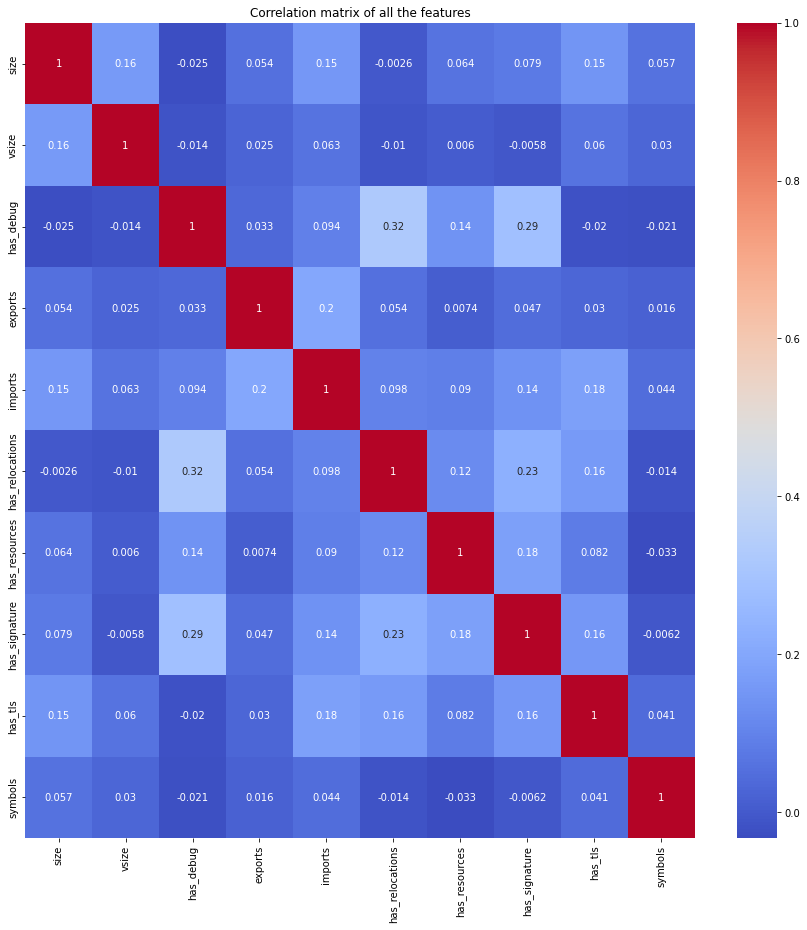

In [119]:
plt.figure(figsize=(15, 15))
sns.heatmap(flattened_general_df.corr(),cmap='coolwarm',annot = True)
plt.title('Correlation matrix of all the features')

In [ ]:
sns.pairplot(flattened_general_df, hue="label", diag_kind="kde")

Text(0.5, 1.0, 'box plot of size feature')

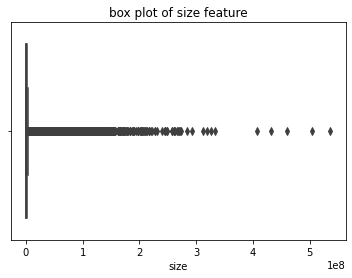

In [120]:
plt.figure()
ax = sns.boxplot(x="size", data=flattened_general_df)
plt.title('box plot of size feature')

In [ ]:
plt.figure()
ax = sns.histplot(x="size", data=flattened_general_df, bins=100)
plt.title('histogram plot of NOX feature')
plt.grid()

In [ ]:
ax= sns.jointplot(x=flattened_general_df.size, y=flattened_general_df.exports, marginal_kws=dict(bins=100))
ax.fig.suptitle('Joint plot')

# TODO: add the label to the dataframe !?

#### Explore: "bla bla" feature  [Train set]

### Explore Test Set  [Train set]

hi